In [2]:
from hcmus.core import appconfig

2025-06-11 14:05:12.951 | INFO     | hcmus.core.appconfig:<module>:7 - Load DotEnv: True


In [3]:
from loguru import logger
from hcmus.data import COCODatasetMerger

/Volumes/Cucumber/Projects/item-identification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
split_weights = {
    'train': {'weight1': 1, 'weight2': 0.1},
    'val': {'weight1': 1, 'weight2': 0.0},
    'test': {'weight1': 1, 'weight2': 0.0}
}
merger = COCODatasetMerger(
    "/Volumes/Cucumber/Projects/datasets/hcmus-iid-2",
    "/Volumes/Cucumber/Projects/datasets/sku110k-zoom",
    "/Volumes/Cucumber/Projects/datasets/2025-06-11/sku110k-merged",
    split_weights
)

num_classes, categories = merger.merge_datasets()
logger.info(f"Dataset merged successfully!")
logger.info(f"Number of classes: {num_classes}")
logger.info(f"Categories: {[cat['name'] for cat in categories]}")

2025-06-11 11:32:18.351 | INFO     | hcmus.data._coco_merger:__init__:37 - Splits to merge: dict_keys(['train', 'val', 'test'])
2025-06-11 11:32:18.352 | INFO     | hcmus.data._coco_merger:__init__:38 - Split weights: {'train': {'weight1': 1, 'weight2': 0.1}, 'val': {'weight1': 1, 'weight2': 0.0}, 'test': {'weight1': 1, 'weight2': 0.0}}


### Keep SKU110k for Train, IID for Val + Test, treat `object` as label

In [4]:
split_weights = {
    'train': {'weight1': 0, 'weight2': 0.1},
    'val': {'weight1': 1, 'weight2': 0.0},
    'test': {'weight1': 1, 'weight2': 0.0}
}
merger = COCODatasetMerger(
    "/Volumes/Cucumber/Projects/datasets/curated/hcmus-iid-object",
    "/Volumes/Cucumber/Projects/datasets/curated/sku110k-zoom",
    "/Volumes/Cucumber/Projects/datasets/process/2025-06-11/sku110k-only",
    split_weights
)

num_classes, categories = merger.merge_datasets()
logger.info(f"Dataset merged successfully!")
logger.info(f"Number of classes: {num_classes}")
logger.info(f"Categories: {[cat['name'] for cat in categories]}")

2025-06-11 14:05:15.308 | INFO     | hcmus.data._coco_merger:__init__:37 - Splits to merge: dict_keys(['train', 'val', 'test'])
2025-06-11 14:05:15.309 | INFO     | hcmus.data._coco_merger:__init__:38 - Split weights: {'train': {'weight1': 0, 'weight2': 0.1}, 'val': {'weight1': 1, 'weight2': 0.0}, 'test': {'weight1': 1, 'weight2': 0.0}}
2025-06-11 14:05:15.310 | INFO     | hcmus.data._coco_merger:merge_datasets:47 - Starting dataset merging...
2025-06-11 14:05:15.310 | INFO     | hcmus.data._coco_merger:_analyze_categories:69 - Analyzing categories from both datasets...
2025-06-11 14:05:16.318 | INFO     | hcmus.data._coco_merger:_analyze_categories:93 - Found 1 unique categories
2025-06-11 14:05:16.318 | INFO     | hcmus.data._coco_merger:_analyze_categories:94 - Total classes (including background): 2
2025-06-11 14:05:16.374 | INFO     | hcmus.data._coco_merger:_merge_split:114 - Merging train split...
2025-06-11 14:05:16.374 | INFO     | hcmus.data._coco_merger:_merge_split:120 - Us

In [5]:
import json
from hcmus.utils.viz_utils import draw_boxes
from PIL import Image, ImageOps
from hcmus.utils import viz_utils
dataset_dir = "/Volumes/Cucumber/Projects/datasets/process/2025-06-11/sku110k-only"
split_name = "val"
annotations_path = f"{dataset_dir}/{split_name}/annotations_{split_name}.json"
images_path = f"{dataset_dir}/{split_name}/images"
annotations = json.load(open(annotations_path))

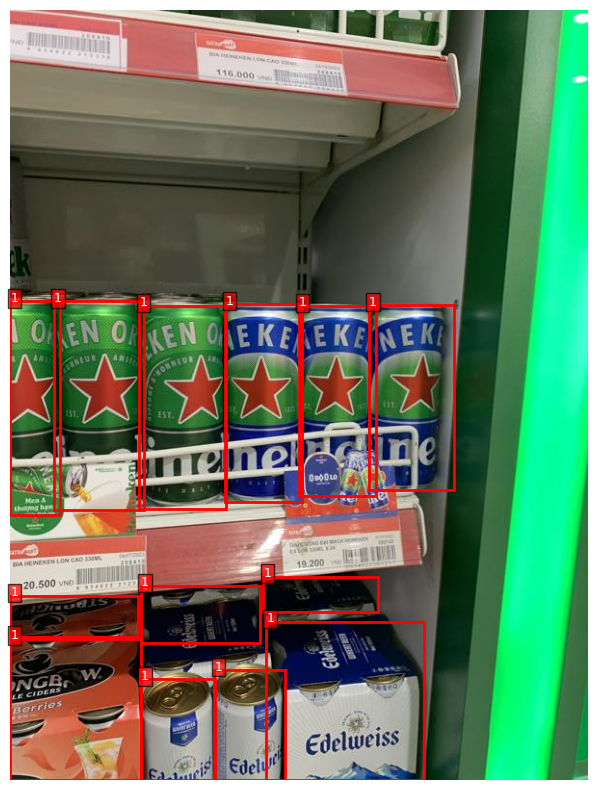

In [6]:
idx = 1
image_idx = annotations.get("images")[idx]
image_path = images_path + "/" + image_idx.get("file_name")
image = Image.open(image_path)
image = ImageOps.exif_transpose(image)
boxes = []
labels = []
for a in annotations.get("annotations"):
    if a.get("image_id") == image_idx.get("id"):
        bbox = a.get("bbox")
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]
        boxes.append(bbox)
        labels.append(str(a.get("category_id")))
viz_utils.draw_boxes(image, boxes, labels)